# Assignment 3 - Fine-Tuning YOLOv5 for Object Detection

*Note: Ignore the execution order of cells in the HTML export of the notebook.*

## Overview and Prerequisites

This notebooks contains the conducted object detection experiments.

All used datasets are from https://roboflow.com. In order to download dataset from there, you normally need to register. For convenience, we provide all datasets via a Google Drive. Download them and place the zip files in the `src/yolov5/datasets` directory.

* Oxford Pets (by species): https://drive.google.com/uc?id=1bfyssR7CfzTqJ-JAgaZNuM0lgTumDcZy&export=download
* Oxford Pets (by breed): https://drive.google.com/uc?id=1e8mAf-pmm1-G5lRiNC0V3FT4SVoWq7Kq&export=download
* Aquarium Dataset: https://drive.google.com/uc?id=1S95wQyyCyrx5l-uHCK_EetJ-VZr0yeZp&export=download

Install additional dependencies (protobuf with specific version is needed to avoid version conflicts with `TensorBoard`).

In [1]:
!pip3 install protobuf==3.19.4 ipywidgets

If haven't installed PyTorch yet, remove the comment in the following cell and execute it. In case you need a `CUDA` version different from 11.3, please refer to https://pytorch.org/get-started/locally/.

In [2]:
#!pip3 install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113

In [2]:
import os

## Constants and Utiltity Functions

In [4]:
datasets_base_path = "datasets" # directory where datasets are located

In [36]:
def adapt_data_yaml(path):
    """
    Adapts the paths of the train and validation set (keys 'train' and 'val') of a data.yaml file (YOLOv5 format)
    to point to 'path'. Addtionally adds the key 'test'.
    The data.yaml file itself also has to be contained in the directory 'path'.
    Each data.yaml may be adapted max. once. If this function is called multiple times for the same
    data.yaml, the behaviour is undefined.
    
    :param str path: Path (directory) where the data.yaml file to be modified is located
    """
    with open(os.path.join(path, "data.yaml"), "r") as f:
        lines = f.readlines()
    
    lines[0] = f"train: {os.path.join(os.pardir, path, 'train', 'images')}\n"
    lines[1] = f"val: {os.path.join(os.pardir, path, 'valid', 'images')}\ntest: {os.path.join(os.pardir, path, 'test', 'images')}\n"

    with open(os.path.join(path, "data.yaml"), "w") as f:
        f.writelines(lines)

## YOLOv5 - Setup


Clone the YOLOv5 GitHub repository.

In [6]:
!rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12345, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12345 (delta 2), reused 2 (delta 1), pack-reused 12335
Receiving objects: 100% (12345/12345), 12.17 MiB | 5.65 MiB/s, done.
Resolving deltas: 100% (8516/8516), done.


Install the dependencies of YOLOv5.

In [7]:
!pip3 install -r yolov5/requirements.txt

## Oxford Pets by Species

* Source: https://public.roboflow.com/object-detection/oxford-pets/2/download/yolov5pytorch
* \# of classes: 2

In [8]:
oxford_pets_species_zip_filename = "oxford_pets_species.zip"
oxford_pets_species_extract_dir = "oxford_pets_species"

Extract the zip file to the specified target directory.

In [9]:
oxford_pets_species_zip_path = os.path.join(datasets_base_path, oxford_pets_species_zip_filename)
oxford_pets_species_extract_path = os.path.join(datasets_base_path, oxford_pets_species_extract_dir)

In [10]:
!rm -rf {oxford_pets_species_extract_path}
!unzip -o {oxford_pets_species_zip_path} -d {oxford_pets_species_extract_path}

Archive:  datasets/oxford_pets_species.zip
 extracting: datasets/oxford_pets_species/README.dataset.txt  
 extracting: datasets/oxford_pets_species/README.roboflow.txt  
 extracting: datasets/oxford_pets_species/data.yaml  
   creating: datasets/oxford_pets_species/test/
   creating: datasets/oxford_pets_species/test/images/
 extracting: datasets/oxford_pets_species/test/images/Abyssinian_127_jpg.rf.4425d22917ead085ad038931b4806c8f.jpg  
 extracting: datasets/oxford_pets_species/test/images/Abyssinian_131_jpg.rf.e8acfb60e4d01529586b9d81930b35a2.jpg  
 extracting: datasets/oxford_pets_species/test/images/Abyssinian_149_jpg.rf.84b8351968b42b38478e0b6c35d58d07.jpg  
 extracting: datasets/oxford_pets_species/test/images/Abyssinian_155_jpg.rf.b0d3e78a69efe3c9aa7bd4416a51e105.jpg  
 extracting: datasets/oxford_pets_species/test/images/Abyssinian_15_jpg.rf.0e12ac0df99238e4f77a9eb02877b769.jpg  
 extracting: datasets/oxford_pets_species/test/images/Abyssinian_167_jpg.rf.de4ef71b17d239eb8920914

 extracting: datasets/oxford_pets_species/test/images/pug_145_jpg.rf.06cdf4e44d76b874717f8d2a99f68665.jpg  
 extracting: datasets/oxford_pets_species/test/images/pug_162_jpg.rf.bf545c42faa5df5d9d0d76e17e48640c.jpg  
 extracting: datasets/oxford_pets_species/test/images/pug_170_jpg.rf.a714c28933c467b7acc611070ff0a75e.jpg  
 extracting: datasets/oxford_pets_species/test/images/pug_176_jpg.rf.73f32c9a08fa120703f1320b492b6b1d.jpg  
 extracting: datasets/oxford_pets_species/test/images/pug_185_jpg.rf.3f19836b96f5d9d63ee39bba2ec541e5.jpg  
 extracting: datasets/oxford_pets_species/test/images/saint_bernard_110_jpg.rf.c91468528ce920012bca25bbd4e7c0a6.jpg  
 extracting: datasets/oxford_pets_species/test/images/saint_bernard_115_jpg.rf.92a9b897d991a817a422bf86ade7fd01.jpg  
 extracting: datasets/oxford_pets_species/test/images/saint_bernard_118_jpg.rf.bddf8e78eba19ff9d2f7cbf3bf90812a.jpg  
 extracting: datasets/oxford_pets_species/test/images/saint_bernard_11_jpg.rf.1a143e0aa200752132aabf086951

 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_128_jpg.rf.6fae8bd4489aa54e136b8223fdeec397.jpg  
 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_129_jpg.rf.b0ddc7b74b9accfb7d185f5e615add06.jpg  
 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_134_jpg.rf.6ec4cd9fc5b82507d75f144744fcf6d7.jpg  
 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_135_jpg.rf.493ddbe62fcffadc1adcc15913af3d8d.jpg  
 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_136_jpg.rf.31e1a02063e150a7e6eb740e9f1159bd.jpg  
 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_137_jpg.rf.2097f2ef3360236aa8b1f7880e835d04.jpg  
 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_139_jpg.rf.3c32014f3f804c95a5712c41fc00aae5.jpg  
 extracting: datasets/oxford_pets_species/train/images/British_Shorthair_140_jpg.rf.ad5f76fa4add27991000089310b75f99.jpg  
 extracting: dat

 extracting: datasets/oxford_pets_species/train/images/Persian_100_jpg.rf.54af43d6c78e330b579a121c0e05053f.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_101_jpg.rf.0c4a0b74c24bdb9b1d17f7fd48ec9099.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_104_jpg.rf.b75d51c59a7afabbd9e26d4eb4c9f411.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_106_jpg.rf.49e45e6b5f2498a983190530fcee2130.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_107_jpg.rf.2fc449ee83fd39c0ffdfd2dba47bef7b.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_108_jpg.rf.2452f7bef93d5879dfd92c3b16e1c8cc.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_111_jpg.rf.33ad67153baff2717a517c435cb806b1.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_112_jpg.rf.d72bb8e6327b19c1ba4f84e58cece53c.jpg  
 extracting: datasets/oxford_pets_species/train/images/Persian_114_jpg.rf.db4bf03f63b0d7182f75b0

 extracting: datasets/oxford_pets_species/train/images/american_bulldog_131_jpg.rf.eb7d3d358fa884643b6423384915e0c0.jpg  
 extracting: datasets/oxford_pets_species/train/images/american_bulldog_132_jpg.rf.8368687987c81b80c7c2cdf8dc2816ae.jpg  
 extracting: datasets/oxford_pets_species/train/images/american_bulldog_133_jpg.rf.6210255699b312cd695a556971b66114.jpg  
 extracting: datasets/oxford_pets_species/train/images/american_bulldog_134_jpg.rf.3078a451a4b30afaa1c49f18cc4f833b.jpg  
 extracting: datasets/oxford_pets_species/train/images/american_bulldog_136_jpg.rf.f46b72ef8e913313a00edb00c553a288.jpg  
 extracting: datasets/oxford_pets_species/train/images/american_bulldog_137_jpg.rf.348ad065d50c345e51724ed4ddfb4a0c.jpg  
 extracting: datasets/oxford_pets_species/train/images/american_bulldog_139_jpg.rf.1b6e5476580ae1bcd885d9c75db4c374.jpg  
 extracting: datasets/oxford_pets_species/train/images/american_bulldog_13_jpg.rf.30a10348248c3f0c7c906cc696a69a6e.jpg  
 extracting: datasets/oxf

 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_116_jpg.rf.cba4d1aa17d73ff7f7559e799f5bf89e.jpg  
 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_118_jpg.rf.65704175ceb6f2f960987d9cb3747949.jpg  
 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_11_jpg.rf.69694402ca76a51a88281bb6db073bb8.jpg  
 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_120_jpg.rf.a73e3411e1af2c0298a81b756ade9bbc.jpg  
 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_122_jpg.rf.9ab9f09d01564b519a17e2f7c12c9b38.jpg  
 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_123_jpg.rf.92c90b3475e9551711121468260e5134.jpg  
 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_124_jpg.rf.b16fb7d01b468d2437460102c6a46ce4.jpg  
 extracting: datasets/oxford_pets_species/train/images/english_cocker_spaniel_125_jpg.rf.00c3b2dfbd88d596

 extracting: datasets/oxford_pets_species/train/images/japanese_chin_104_jpg.rf.36462b098799575530129c71de139ac5.jpg  
 extracting: datasets/oxford_pets_species/train/images/japanese_chin_106_jpg.rf.40745996351394b75e562515fd6f9aa1.jpg  
 extracting: datasets/oxford_pets_species/train/images/japanese_chin_107_jpg.rf.ca4ba4fbe58f0c702b8b8a5f367c99da.jpg  
 extracting: datasets/oxford_pets_species/train/images/japanese_chin_109_jpg.rf.66296adb0479e00af0070a1e46757a68.jpg  
 extracting: datasets/oxford_pets_species/train/images/japanese_chin_110_jpg.rf.c7ade647bf032e8fbc82ffc466d8a4a7.jpg  
 extracting: datasets/oxford_pets_species/train/images/japanese_chin_111_jpg.rf.841b695693b11e2d34eb76f7f11d742d.jpg  
 extracting: datasets/oxford_pets_species/train/images/japanese_chin_112_jpg.rf.fa80ebadacc09e225ff49689dc34c719.jpg  
 extracting: datasets/oxford_pets_species/train/images/japanese_chin_113_jpg.rf.1054c0f1952026c1d18d4b55a4f3cbac.jpg  
 extracting: datasets/oxford_pets_species/train/

 extracting: datasets/oxford_pets_species/train/images/pomeranian_149_jpg.rf.ac11c44d7ca0105aa782baef69fd5676.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_14_jpg.rf.775ca139df73e034d6d47df8d2cd7af4.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_150_jpg.rf.143dc34f653496eabed479c004e83747.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_151_jpg.rf.14a70699778261c98aff7652c5f02a7c.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_152_jpg.rf.3f2400f2a252383f99517a66d5ebc475.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_153_jpg.rf.b28cf21684bb49acc4f39e2689ca8694.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_154_jpg.rf.2a07fb58ff2ddd446a2e17a330ad6ca0.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_155_jpg.rf.f2a7593d7cf1d88804201528fcb89fe3.jpg  
 extracting: datasets/oxford_pets_species/train/images/pomeranian_156_jpg

 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_terrier_110_jpg.rf.32760200c7faccfeb67a7135ba4a82ba.jpg  
 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_terrier_112_jpg.rf.cc3adf80474a61069749b562495c842c.jpg  
 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_terrier_113_jpg.rf.68f038a67789760dd81421c3d7bfec01.jpg  
 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_terrier_116_jpg.rf.d9aa92cb666405d7d115f44be1798f8e.jpg  
 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_terrier_118_jpg.rf.564dfa1a75cd776b5cf1bed25dcbb1d3.jpg  
 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_terrier_119_jpg.rf.fb13dc671af50d916874a88f8e50269a.jpg  
 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_terrier_121_jpg.rf.43f48ba2862b6e565943d41b9a998f82.jpg  
 extracting: datasets/oxford_pets_species/train/images/staffordshire_bull_te

 extracting: datasets/oxford_pets_species/train/labels/english_setter_121_jpg.rf.dbbe8d54955989254417d41852a34918.txt  
 extracting: datasets/oxford_pets_species/train/labels/english_setter_122_jpg.rf.7796975fe4080641ec687ca4d210fa64.txt  
 extracting: datasets/oxford_pets_species/train/labels/english_setter_123_jpg.rf.2ff66cc3fac3315d4b20445b0851a09c.txt  
 extracting: datasets/oxford_pets_species/train/labels/english_setter_124_jpg.rf.9ad7866990adad0cb57088ab0db439f1.txt  
 extracting: datasets/oxford_pets_species/train/labels/english_setter_125_jpg.rf.2bafab399b3722f95a6a59783030e99f.txt  
 extracting: datasets/oxford_pets_species/train/labels/english_setter_126_jpg.rf.47353e702a8801be0f1e061cb6b3415f.txt  
 extracting: datasets/oxford_pets_species/train/labels/english_setter_127_jpg.rf.7cb5af17f2ad0c98a1185ba0e34bf463.txt  
 extracting: datasets/oxford_pets_species/train/labels/english_setter_128_jpg.rf.f411e80df09e588a1174ffc2dde80040.txt  
 extracting: datasets/oxford_pets_specie

 extracting: datasets/oxford_pets_species/valid/images/Siamese_127_jpg.rf.85c5339f4cefaac408d8b902d8aba4ec.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_151_jpg.rf.4234dbe94b3f4000eb7cb59a2678395c.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_157_jpg.rf.b93faea16b7025795da979d44c83c000.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_165_jpg.rf.8e9bd35f5d5e1d32f106052bf53aa76e.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_167_jpg.rf.aa6bd651f4a954a37534f210a07581f9.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_168_jpg.rf.89440b068ecd255759d290993c4c8172.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_175_jpg.rf.718cd6836ab0d9a2a9b5ff66ab48ead9.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_178_jpg.rf.5e8e2414817e42a68088b2483c555e40.jpg  
 extracting: datasets/oxford_pets_species/valid/images/Siamese_185_jpg.rf.f6e0b34199d8f3111c3910

 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_112_jpg.rf.07ced135022dbec50f39be15d24f0864.jpg  
 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_113_jpg.rf.289e9944dd1afa54d503609499c749e4.jpg  
 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_116_jpg.rf.204b5ac9156f40a9ce5ad1c100f7ca66.jpg  
 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_136_jpg.rf.b8a9c802fd005b4c48bbe6d84c47fc4d.jpg  
 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_143_jpg.rf.f0118d87cdc52ada5dd3094771a685ae.jpg  
 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_145_jpg.rf.379cf8b931143dd6d8aee4854bf46814.jpg  
 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_151_jpg.rf.e615f0c4c1d9f9855139c74c55c3018c.jpg  
 extracting: datasets/oxford_pets_species/valid/images/scottish_terrier_156_jpg.rf.7e9f72b6fcf16bba3debca3ac9e8504d.jpg  
 extracting: datasets/ox

Adapt the paths in the `data.yaml` to fit our project structure.

In [37]:
adapt_data_yaml(oxford_pets_species_extract_path)

Fine-tune pre-trained `YOLOv5n`.

In [12]:
weights = "yolov5n.pt"
data = "datasets/oxford_pets_species/data.yaml"
project = "runs/train"
project_name = f"yolov5n_oxford_pets_species"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --batch 32 --epochs 150 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5n.pt, cfg=, data=datasets/oxford_pets_species/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5n_oxford_pets_species, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    33/149     4.96G   0.02485   0.01107  0.003182        31       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.969      0.944      0.983      0.764

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    34/149     4.96G   0.02414    0.0113  0.002904        36       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.958      0.962       0.98      0.761

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    35/149     4.96G    0.0237   0.01097   0.00301        39       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        737      0.968      0.944      0.985      0.766

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    84/149     4.96G   0.01933  0.009573  0.002067        30       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.977      0.965      0.989      0.798

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    85/149     4.96G   0.01951  0.009502  0.001833        43       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.964      0.976      0.989      0.803

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    86/149     4.96G   0.01911  0.009089  0.001469        36       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738       0.98      0.976      0.992      0.812

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   135/149     4.96G   0.01596  0.008273  0.001313        35       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.988      0.981      0.994      0.842

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   136/149     4.96G    0.0153  0.008078 0.0006545        33       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.985      0.985      0.994      0.843

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   137/149     4.96G   0.01538  0.008261 0.0008322        32       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.985      0.984      0.994      0.847

     Epoch   gpu_mem       box      

Fine-tune pre-trained `YOLOv5s`.

In [13]:
weights = "yolov5s.pt"
data = "datasets/oxford_pets_species/data.yaml"
project = "runs/train"
project_name = f"yolov5s_oxford_pets_species"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --batch 32 --epochs 150 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5s.pt, cfg=, data=datasets/oxford_pets_species/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_oxford_pets_species, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     9/149     6.07G   0.02907   0.01297   0.00545        38       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.937      0.903      0.957      0.683

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/149     6.07G   0.02856   0.01247  0.004974        35       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.961      0.912      0.977      0.714

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/149     6.07G   0.02786    0.0121  0.004658        32       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.946      0.929      0.968      0.697

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    60/149     6.07G   0.01873  0.009165  0.002432        38       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.979      0.973      0.988      0.821

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/149     6.07G   0.01843  0.008867  0.001643        29       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.971      0.977      0.992      0.829

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    62/149     6.07G   0.01858  0.008758  0.001637        38       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.981      0.985      0.993      0.834

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   111/149     6.07G   0.01412  0.007419  0.001018        33       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.987      0.987      0.994      0.862

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   112/149     6.07G   0.01455  0.007415  0.001168        38       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738       0.99      0.981      0.994      0.856

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   113/149     6.07G   0.01428  0.007282  0.001037        32       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738       0.99      0.984      0.994      0.859

     Epoch   gpu_mem       box      

## Oxford Pets by Breed

* Source: https://public.roboflow.com/object-detection/oxford-pets/1/download/yolov5pytorch
* \# of classes: 37

In [25]:
oxford_pets_breed_zip_filename = "oxford_pets_breed.zip"
oxford_pets_breed_extract_dir = "oxford_pets_breed"

Extract the zip file to the specified target directory.

In [26]:
oxford_pets_breed_zip_path = os.path.join(datasets_base_path, oxford_pets_breed_zip_filename)
oxford_pets_breed_extract_path = os.path.join(datasets_base_path, oxford_pets_breed_extract_dir)

In [27]:
!rm -rf {oxford_pets_breed_extract_path}
!unzip -o {oxford_pets_breed_zip_path} -d {oxford_pets_breed_extract_path}

Archive:  datasets/oxford_pets_breed.zip
 extracting: datasets/oxford_pets_breed/README.roboflow.txt  
 extracting: datasets/oxford_pets_breed/data.yaml  
   creating: datasets/oxford_pets_breed/test/
   creating: datasets/oxford_pets_breed/test/images/
 extracting: datasets/oxford_pets_breed/test/images/Abyssinian_127_jpg.rf.b2553880d73a78e26e396fe7775f31be.jpg  
 extracting: datasets/oxford_pets_breed/test/images/Abyssinian_131_jpg.rf.3aeee0801499f335e3a59b51189e1351.jpg  
 extracting: datasets/oxford_pets_breed/test/images/Abyssinian_149_jpg.rf.b6b4a72a93f8bc2b239b18c5d181190c.jpg  
 extracting: datasets/oxford_pets_breed/test/images/Abyssinian_155_jpg.rf.fdd90a163673ab77ec9690317a69b94e.jpg  
 extracting: datasets/oxford_pets_breed/test/images/Abyssinian_15_jpg.rf.7bc44eeb9865e35cb1d5f9ef4f53b381.jpg  
 extracting: datasets/oxford_pets_breed/test/images/Abyssinian_167_jpg.rf.1d367cb1cf82c1e5ebda79fda928cee5.jpg  
 extracting: datasets/oxford_pets_breed/test/images/Abyssinian_174_jp

 extracting: datasets/oxford_pets_breed/test/labels/havanese_144_jpg.rf.d3e2e8cb9a7801e61894e372c4f1e1bb.txt  
 extracting: datasets/oxford_pets_breed/test/labels/havanese_149_jpg.rf.9c1440a7bf5ceff854a1b956b10086ab.txt  
 extracting: datasets/oxford_pets_breed/test/labels/havanese_150_jpg.rf.e14cc52d99df0462ae2390e94408b2d6.txt  
 extracting: datasets/oxford_pets_breed/test/labels/havanese_157_jpg.rf.18088a3ef4a667e5c0b961bac78d0c75.txt  
 extracting: datasets/oxford_pets_breed/test/labels/havanese_15_jpg.rf.5eb7536263547c62d51849bac373c9a5.txt  
 extracting: datasets/oxford_pets_breed/test/labels/havanese_167_jpg.rf.781407109049892df594fd012b4c1ade.txt  
 extracting: datasets/oxford_pets_breed/test/labels/havanese_170_jpg.rf.0adae255c37da9499cc5583420199a37.txt  
 extracting: datasets/oxford_pets_breed/test/labels/havanese_188_jpg.rf.8b7872f245f5884541b7f770bb41fbc9.txt  
 extracting: datasets/oxford_pets_breed/test/labels/japanese_chin_103_jpg.rf.17bf9403278f76748ecb22aff5dbfedf.txt

 extracting: datasets/oxford_pets_breed/train/images/Egyptian_Mau_196_jpg.rf.8bcea59bd4bd8216adab7dc12824c141.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Egyptian_Mau_197_jpg.rf.d27047a2e54f41cf00d2eee886911d3d.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Maine_Coon_100_jpg.rf.b9fc740d1ad8a902088deeeaf56e297c.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Maine_Coon_101_jpg.rf.18e2857a3315caecd86fd26eec4df255.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Maine_Coon_102_jpg.rf.df0a5a65d9fc458c24100bc14075f52f.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Maine_Coon_103_jpg.rf.e5dfc9b3a85164816712f1bac4ddd129.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Maine_Coon_105_jpg.rf.4b56bd4dcda168bea916c1cf7000b9b0.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Maine_Coon_108_jpg.rf.689a891f740c146a1f2d3773d9908c5d.jpg  
 extracting: datasets/oxford_pets_breed/train/images/Maine_Coon_109_jpg.rf.047b313e2

 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_141_jpg.rf.89520a14ba6948ec114bc2db52b1b36e.jpg  
 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_143_jpg.rf.1b362fe9f0241fc43107e030d827442b.jpg  
 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_146_jpg.rf.613ab2d30738212542e7095f1812eb86.jpg  
 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_147_jpg.rf.db1f3d265fddae488bdb5ccf155522d0.jpg  
 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_150_jpg.rf.2cf5d664f909160d7017ca91de9c914a.jpg  
 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_151_jpg.rf.9d252a2bbddec7258414bdbae50c29ad.jpg  
 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_152_jpg.rf.5c854594fa62cd89fb6bce6c9da135af.jpg  
 extracting: datasets/oxford_pets_breed/train/images/american_bulldog_153_jpg.rf.4a6a601e21add6b57547feac6336765c.jpg  
 extracting: datasets/oxford_pets_breed/

 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_168_jpg.rf.1874ae6c461731fee203c510f25b2bf7.jpg  
 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_169_jpg.rf.549c5fe2817da74e5aa2d2fccc3ee0ac.jpg  
 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_170_jpg.rf.82130f5478d8aa19e87bbc57d3b9da5a.jpg  
 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_171_jpg.rf.3443f2e9c28b50d5997cc19384a15276.jpg  
 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_172_jpg.rf.a27483434de25482454267a9cd077825.jpg  
 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_174_jpg.rf.ca49874972258c2c51ceab7040a0fad8.jpg  
 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_175_jpg.rf.110af67e5849205f6b957c5be8017cac.jpg  
 extracting: datasets/oxford_pets_breed/train/images/english_cocker_spaniel_176_jpg.rf.bd4a7cb099e3a39150bf8a2bb6d9a60

 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_181_jpg.rf.8433ba4115e54ad7a3915d4c2fa6c7fa.jpg  
 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_182_jpg.rf.6edb4d31f26b87db5cd94fd52e3a2124.jpg  
 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_184_jpg.rf.b5a491618d439b133d0ca6fa747c0ca3.jpg  
 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_185_jpg.rf.c0072e44114867e1ca2c51c24764188e.jpg  
 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_187_jpg.rf.8397ef3d9fed0a5f6147b710a44e894f.jpg  
 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_188_jpg.rf.c37fd3aa3efcad80ee69cf17ddfbc999.jpg  
 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_18_jpg.rf.84ce5d9f013d01beb1175674c5a9a61e.jpg  
 extracting: datasets/oxford_pets_breed/train/images/japanese_chin_190_jpg.rf.3a7b725cb6a3b7c02489834865e40b58.jpg  
 extracting: datasets/oxford_pets_breed/train/images/keeshond_100

 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_112_jpg.rf.7bdd18fea9f29daf8da277f9996693ff.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_113_jpg.rf.1d109d7eb5fdd0a1ac1659d5e9c6eaf8.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_114_jpg.rf.3958d01808c4ca2a9c2aa0c3a0654a5a.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_116_jpg.rf.1d63835d69565d577d689ace9a83bee3.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_117_jpg.rf.4cec5649353d609d7ee28fb2326fff1c.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_119_jpg.rf.ad97bc6133910954d47f8daee690729e.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_120_jpg.rf.59e1189d04b8a696dbc590a333e0d09b.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_bernard_123_jpg.rf.1a660c5c04b696a123d00e0b56b45482.jpg  
 extracting: datasets/oxford_pets_breed/train/images/saint_berna

 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_140_jpg.rf.07172848afac5d5d89eae88d54593fff.jpg  
 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_142_jpg.rf.eba8f333fcd22dc3240c127b7e4bc664.jpg  
 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_144_jpg.rf.80b184245a5f7b1b22bf4a0c7016a7dc.jpg  
 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_145_jpg.rf.f2e6853edaa88c31bc278a8b8cb47300.jpg  
 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_146_jpg.rf.3529087e4631d90e32a60020e1d18ba2.jpg  
 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_148_jpg.rf.f9ad67e9dd5ed5e9cb43c003a18f1756.jpg  
 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_149_jpg.rf.c9cce5fdd0ab244b43af550557cf7017.jpg  
 extracting: datasets/oxford_pets_breed/train/images/wheaten_terrier_14_jpg.rf.2d5b99e2bfe78174261bf8999446e7ed.jpg  
 extracting: datasets/oxford_pets_breed/train/ima

 extracting: datasets/oxford_pets_breed/train/labels/pug_136_jpg.rf.71e4302537d794e2e92e56c2c7b52d19.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_137_jpg.rf.c16a5137bdfb3310728ee7ee92ddc13b.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_138_jpg.rf.560011147b9b61c82c15108f33f68ad0.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_139_jpg.rf.2be6246234a8beaee907bd0aaf7bbeff.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_13_jpg.rf.474c24e38465567160439dc89398bb72.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_141_jpg.rf.603f56ee9a0b5e5d0d7db1c1620c606f.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_144_jpg.rf.75db9f8b262e0e7e3c73b02bf779aa72.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_147_jpg.rf.586bf6d19b510a4fa43d4e7591a0d20d.txt  
 extracting: datasets/oxford_pets_breed/train/labels/pug_148_jpg.rf.1b4f7fa527a6f71e2b3f168c2ba0cd92.txt  
 extracting: datasets/oxford_pets_bree

 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_119_jpg.rf.ab74dad96a062427c55824f1bdf584d5.jpg  
 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_126_jpg.rf.6915b5920dffbc3c38a4ffd55d0f75ec.jpg  
 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_129_jpg.rf.bdc0225fb6f6c83b365dd5fc15a69bfa.jpg  
 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_132_jpg.rf.9656db032817e2d615449286fe74f80d.jpg  
 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_136_jpg.rf.0361149afd38d18451bf2c1c4b8f8e8e.jpg  
 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_140_jpg.rf.52b394a0234e34868c5eaaac3b14628a.jpg  
 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_143_jpg.rf.b5a913d4dbed1bcb4beb3c053dad80f0.jpg  
 extracting: datasets/oxford_pets_breed/valid/images/english_cocker_spaniel_151_jpg.rf.39076df03920a4462234e359418221c

 extracting: datasets/oxford_pets_breed/valid/labels/Ragdoll_166_jpg.rf.6bf4391ad2cebaf2677c9276f098d69b.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Ragdoll_168_jpg.rf.de32388d622f476d047a52732d5ec2d4.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Ragdoll_169_jpg.rf.d089bf89fc4cbccfdbff8c7758e8f283.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Ragdoll_172_jpg.rf.913e680efd4e1ea850dde2f643c8f4b6.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Ragdoll_175_jpg.rf.bbcbb639bdd3f13c08ec24ad1095497f.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Ragdoll_193_jpg.rf.1f2dcddd12a21faa41a9885aa6b6c89c.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Ragdoll_194_jpg.rf.b7c95b1c23418e5bd6cc9c14189f3d47.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Russian_Blue_101_jpg.rf.744a8a782acb898dc37b75002bfb86b5.txt  
 extracting: datasets/oxford_pets_breed/valid/labels/Russian_Blue_104_jpg.rf.dfd3157d5dcd90b5b348cba0473775

Adapt the paths in the `data.yaml` to fit our project structure.

In [38]:
adapt_data_yaml(oxford_pets_breed_extract_path)

Fine-tune pre-trained `YOLOv5n`.

In [31]:
weights = "yolov5n.pt"
data = "datasets/oxford_pets_breed/data.yaml"
project = "runs/train"
project_name = f"yolov5n_oxford_pets_breed"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --batch 32 --epochs 150 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5n.pt, cfg=, data=datasets/oxford_pets_breed/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5n_oxford_pets_breed, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     9/149     4.99G   0.03129   0.01316   0.07475        29       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        717      0.308      0.257      0.138     0.0885

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/149     4.99G   0.03028   0.01251   0.07378        31       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.217      0.378      0.166      0.113

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/149     4.99G   0.02955    0.0123   0.07218        24       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.165      0.318      0.155      0.103

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    60/149     4.99G   0.02642   0.01114   0.02321        18       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.701      0.704      0.773      0.576

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/149     4.99G   0.02774   0.01105   0.02429        24       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        717      0.725      0.738      0.793      0.596

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    62/149     4.99G    0.0272   0.01097    0.0247        25       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.674      0.678      0.715      0.513

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   111/149     4.99G   0.02168  0.009626   0.01423        29       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        717      0.833      0.795      0.871      0.702

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   112/149     4.99G   0.02133   0.00958   0.01396        24       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.827      0.799      0.876      0.703

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   113/149     4.99G   0.02148  0.009949   0.01363        34       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.824      0.809      0.883       0.71

     Epoch   gpu_mem       box      

Fine-tune pre-trained `YOLOv5s`.

In [29]:
weights = "yolov5s.pt"
data = "datasets/oxford_pets_breed/data.yaml"
project = "runs/train"
project_name = f"yolov5s_oxford_pets_breed"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --batch 32 --epochs 150 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5s.pt, cfg=, data=datasets/oxford_pets_breed/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_oxford_pets_breed, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     8/149     6.41G   0.03023   0.01189   0.06963        19       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.229      0.469      0.248      0.172

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     9/149     6.41G   0.03033   0.01171   0.06712        28       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.242      0.478      0.292      0.196

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/149     6.41G   0.02945   0.01181   0.06386        23       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.287      0.532      0.386      0.267

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    59/149     6.41G   0.02466  0.009669   0.01787        20       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        718      0.792      0.772      0.839      0.655

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    60/149     6.41G   0.02516  0.009984   0.01748        30       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        717      0.829      0.755      0.865      0.672

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/149     6.41G   0.02482   0.01014   0.01775        27       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        717      0.817      0.772      0.852      0.654

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   110/149     6.41G   0.01839  0.008021  0.009121        23       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        717      0.862      0.845      0.912      0.752

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   111/149     6.41G   0.01873  0.008193  0.009179        28       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        715      0.857      0.844      0.907      0.749

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   112/149     6.41G   0.01867  0.008247  0.009367        30       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        716        715      0.854      0.857      0.912      0.749

     Epoch   gpu_mem       box      

Results saved to runs/train/yolov5s_oxford_pets_breed


## Aquarium Dataset

* Source: https://public.roboflow.com/object-detection/aquarium/2/download/yolov5pytorch
* \# of classes: 7

In [14]:
aquarium_zip_filename = "aquarium.zip"
aquarium_extract_dir = "aquarium"

Extract the zip file to the specified target directory.

In [15]:
aquarium_zip_path = os.path.join(datasets_base_path, aquarium_zip_filename)
aquarium_extract_path = os.path.join(datasets_base_path, aquarium_extract_dir)

In [16]:
!rm -rf {aquarium_extract_path}
!unzip -o {aquarium_zip_path} -d {aquarium_extract_path}

Archive:  datasets/aquarium.zip
 extracting: datasets/aquarium/README.dataset.txt  
 extracting: datasets/aquarium/README.roboflow.txt  
 extracting: datasets/aquarium/data.yaml  
   creating: datasets/aquarium/test/
   creating: datasets/aquarium/test/images/
 extracting: datasets/aquarium/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
 extracting: datasets/aquarium/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
 extracting: datasets/aquarium/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
 extracting: datasets/aquarium/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
 extracting: datasets/aquarium/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
 extracting: datasets/aquarium/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg  
 extracting: datasets/aquarium/test/images/IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg  
 extracting: datas

 extracting: datasets/aquarium/train/images/IMG_2352_jpeg_jpg.rf.b91c732f98fab8234ac4ec50f25a7c32.jpg  
 extracting: datasets/aquarium/train/images/IMG_2358_jpeg_jpg.rf.efdef53aafee680685b00990131e1442.jpg  
 extracting: datasets/aquarium/train/images/IMG_2359_jpeg_jpg.rf.9a22271fa084fd7ba13ffe880215c8f4.jpg  
 extracting: datasets/aquarium/train/images/IMG_2360_jpeg_jpg.rf.1f04ed9c5472f410de3263510a5de6dd.jpg  
 extracting: datasets/aquarium/train/images/IMG_2361_jpeg_jpg.rf.02195fab4639c0b58bef41a6944fda9d.jpg  
 extracting: datasets/aquarium/train/images/IMG_2362_jpeg_jpg.rf.a1ac6ab5801ffa496d0fbd6038ebf034.jpg  
 extracting: datasets/aquarium/train/images/IMG_2363_jpeg_jpg.rf.c646c1cefead3cafbda9956f065dbe6a.jpg  
 extracting: datasets/aquarium/train/images/IMG_2364_jpeg_jpg.rf.28f37990b12a2ca62cd367362cf202d4.jpg  
 extracting: datasets/aquarium/train/images/IMG_2365_jpeg_jpg.rf.9091a7e8b24fcf1d8493c5a4dd1310d1.jpg  
 extracting: datasets/aquarium/train/images/IMG_2368_jpeg_jpg.rf

 extracting: datasets/aquarium/train/images/IMG_2563_jpeg_jpg.rf.a5bfbdba4fbd07a7e5a65af1c3df8d14.jpg  
 extracting: datasets/aquarium/train/images/IMG_2564_jpeg_jpg.rf.9408f71747791414c81ea69f05c758f4.jpg  
 extracting: datasets/aquarium/train/images/IMG_2565_jpeg_jpg.rf.5e9644aca24248d1bd9d06836921783f.jpg  
 extracting: datasets/aquarium/train/images/IMG_2566_jpeg_jpg.rf.8f6fd7144a30307e3f577604b587d0ff.jpg  
 extracting: datasets/aquarium/train/images/IMG_2568_jpeg_jpg.rf.97af3e8a02e5b4ed4f65d38560934812.jpg  
 extracting: datasets/aquarium/train/images/IMG_2571_jpeg_jpg.rf.d26821c850b04ab5dc79a9b1fdcbea2b.jpg  
 extracting: datasets/aquarium/train/images/IMG_2572_jpeg_jpg.rf.5a3356eac09c160bd2956aaed8a9ed00.jpg  
 extracting: datasets/aquarium/train/images/IMG_2573_jpeg_jpg.rf.b7884c20265e0dd7cefe21da58643216.jpg  
 extracting: datasets/aquarium/train/images/IMG_2575_jpeg_jpg.rf.8736d619bdee1d73390ae7476c9d4931.jpg  
 extracting: datasets/aquarium/train/images/IMG_2576_jpeg_jpg.rf

 extracting: datasets/aquarium/train/images/IMG_3169_jpeg_jpg.rf.00b985cb8ddf5da8964dc21435e1bd2c.jpg  
 extracting: datasets/aquarium/train/images/IMG_3170_jpeg_jpg.rf.12acc73c5aaf986bf28d119f89015a10.jpg  
 extracting: datasets/aquarium/train/images/IMG_3172_jpeg_jpg.rf.ce1a948fee49ecf8e542db885541bcab.jpg  
 extracting: datasets/aquarium/train/images/IMG_3174_jpeg_jpg.rf.94153bec4eb7e39ce631323f8f126031.jpg  
 extracting: datasets/aquarium/train/images/IMG_3176_jpeg_jpg.rf.d2ccf3978d7846c94fcb5d7700ea50dc.jpg  
 extracting: datasets/aquarium/train/images/IMG_3177_jpeg_jpg.rf.21ff231136bee6d8d2d88475c2ca47ce.jpg  
 extracting: datasets/aquarium/train/images/IMG_3181_jpeg_jpg.rf.c52b54494d4236e54b900fe60bd6565b.jpg  
 extracting: datasets/aquarium/train/images/IMG_3182_jpeg_jpg.rf.3e85376545651810d891af33d25e6bcf.jpg  
 extracting: datasets/aquarium/train/images/IMG_3186_jpeg_jpg.rf.27529a442577197646428640172a7920.jpg  
 extracting: datasets/aquarium/train/images/IMG_3187_jpeg_jpg.rf

 extracting: datasets/aquarium/train/images/IMG_8590_MOV-3_jpg.rf.5acced567b7a3d53c4cf07768f40e770.jpg  
 extracting: datasets/aquarium/train/images/IMG_8590_MOV-4_jpg.rf.1691f0958ffea266daa9011c203cd726.jpg  
 extracting: datasets/aquarium/train/images/IMG_8591_MOV-0_jpg.rf.950e816e96ad35460046e2402c0f26a9.jpg  
 extracting: datasets/aquarium/train/images/IMG_8591_MOV-2_jpg.rf.fb399b446ec6ccc12bea5b9321486b34.jpg  
 extracting: datasets/aquarium/train/images/IMG_8593_MOV-0_jpg.rf.7af9eba367ddb825b99a4c314856cd80.jpg  
 extracting: datasets/aquarium/train/images/IMG_8593_MOV-2_jpg.rf.e9995795a521680a6f70f03810142d58.jpg  
 extracting: datasets/aquarium/train/images/IMG_8594_jpg.rf.c5476deec8c02b1ed2d106d5bb1a883d.jpg  
 extracting: datasets/aquarium/train/images/IMG_8595_MOV-2_jpg.rf.055891706f32e5310829f3a0a46cec5e.jpg  
 extracting: datasets/aquarium/train/images/IMG_8598_jpg.rf.761ffe2966ae3fae2a3f5615df36370e.jpg  
 extracting: datasets/aquarium/train/images/IMG_8599_MOV-0_jpg.rf.3

 extracting: datasets/aquarium/valid/images/IMG_8384_jpg.rf.21b6079e4a1750b15c0ad33e455b0ed3.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8391_jpg.rf.c86804c2c59d47313c910ac80927da01.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8407_jpg.rf.c1c56f0c5b11da7c9f5075cb7f08d80c.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8448_jpg.rf.f0f8cdc741e2f94c9c8a2dbf8af6fb6a.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8460_jpg.rf.0b35f63073f0b4475ded61866164eb57.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8465_jpg.rf.4e9f92133e269119a82e502339b7981e.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8489_jpg.rf.e79ed773754ce88ed4a9a9042d98dca9.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8496_MOV-2_jpg.rf.a07bf41c4d61ee18223b3cf390c8fdda.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8497_MOV-2_jpg.rf.3b4c0871d43d7284969d7892961a3f69.jpg  
 extracting: datasets/aquarium/valid/images/IMG_8497_MOV-4_jpg.rf.2acc65d2369cd13c88ab1e4307e4017

Adapt the paths in the `data.yaml` to fit our project structure.

In [39]:
adapt_data_yaml(aquarium_extract_path)

Fine-tune pre-trained `YOLOv5n`.

In [21]:
weights = "yolov5n.pt"
data = "datasets/aquarium/data.yaml"
project = "runs/train"
project_name = f"yolov5n_aquarium_sgd"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --batch 16 --epochs 300 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5n.pt, cfg=, data=datasets/aquarium/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5n_aquarium_sgd, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     9/299     2.38G   0.05835   0.06979   0.02391       220       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.608      0.236      0.272      0.106

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/299     2.38G   0.05859   0.06957   0.02355       211       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.363      0.364      0.304      0.124

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299     2.38G   0.05483   0.06943   0.02141       237       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.391      0.337      0.274      0.116

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    60/299     2.38G   0.04374   0.05619  0.004796       194       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.748      0.633      0.704      0.371

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/299     2.38G   0.04443   0.05945  0.004942       219       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.781      0.629      0.694      0.357

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    62/299     2.38G   0.04114   0.05093  0.004851       277       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.735      0.683      0.724      0.351

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   111/299     2.38G   0.03718   0.05205  0.002508       186       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.794      0.689      0.733       0.39

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   112/299     2.38G   0.03876   0.05217  0.002526       212       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.805       0.67      0.728      0.395

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   113/299     2.38G   0.03779   0.04853   0.00259       316       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.815      0.654       0.73      0.389

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   162/299     2.38G   0.03534   0.04873  0.001984       212       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909       0.77        0.7      0.742      0.413

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   163/299     2.38G   0.03393   0.04213  0.001877       120       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909       0.81      0.684       0.73      0.407

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   164/299     2.38G   0.03453   0.04736  0.001856       196       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.817      0.679      0.731      0.412

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   213/299     2.38G   0.03155   0.04287   0.00159       215       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.784      0.672      0.741      0.417

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   214/299     2.38G    0.0319   0.04374  0.001453       263       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.781      0.687      0.738       0.41

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   215/299     2.38G   0.03234   0.04571  0.001619       214       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.787       0.68      0.748      0.419

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   264/299     2.38G   0.02924   0.03964  0.001022       147       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.783       0.69      0.742      0.426

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   265/299     2.38G   0.02996   0.04141   0.00117       219       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.795      0.695       0.75      0.427

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   266/299     2.38G   0.03041   0.04105 0.0009616       162       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.786      0.693       0.74      0.421

     Epoch   gpu_mem       box      

In [22]:
weights = "yolov5n.pt"
data = "datasets/aquarium/data.yaml"
project = "runs/train"
project_name = f"yolov5n_aquarium_adamw"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --optimizer AdamW --batch 16 --epochs 300 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5n.pt, cfg=, data=datasets/aquarium/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=AdamW, sync_bn=False, workers=8, project=runs/train, name=yolov5n_aquarium_adamw, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 6.73 KiB | 6.73 MiB/s, done.
From https://github.com/ultralytics/yolov5
   a91d342..c7b1a3c  classifier -> origin/classifier
github: up to date with https:


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    29/299     2.38G   0.05512   0.07323   0.01793       159       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.398      0.442      0.389       0.16

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    30/299     2.38G   0.05513   0.07339   0.01721       218       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.401      0.452      0.403      0.169

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    31/299     2.38G   0.05526   0.07129   0.01719       218       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.431      0.428      0.404      0.165

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    80/299     2.38G   0.04686   0.06301  0.006635       209       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.676      0.591      0.641        0.3

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    81/299     2.38G   0.04721   0.06578   0.00662       202       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.721      0.583      0.654       0.31

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    82/299     2.38G   0.04785    0.0661  0.006419       194       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.621       0.59      0.641       0.29

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   131/299     2.38G   0.04166   0.05563  0.003893       193       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.732      0.593       0.65      0.328

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   132/299     2.38G   0.04217   0.05581  0.003778       195       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.732       0.62      0.658      0.325

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   133/299     2.38G   0.04088   0.05506  0.003677       186       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.705      0.609      0.657      0.344

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   182/299     2.38G   0.03931   0.05693  0.002719       251       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909       0.78      0.636      0.704      0.368

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   183/299     2.38G    0.0396    0.0538  0.002826       223       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.771      0.658      0.713      0.372

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   184/299     2.38G   0.03883   0.05335  0.002655       271       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.782      0.623      0.696      0.361

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   233/299     2.38G   0.03666   0.04902  0.002205       216       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.739        0.7      0.707      0.378

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   234/299     2.38G   0.03598   0.04622  0.001945       195       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.782      0.641       0.69      0.368

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   235/299     2.38G   0.03649   0.04773  0.002113       185       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.748      0.653      0.701       0.37

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   284/299     2.38G   0.03331   0.04528  0.001676       119       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.787      0.688      0.727      0.397

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   285/299     2.38G   0.03279   0.04544   0.00146       163       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.767        0.7       0.73      0.398

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   286/299     2.38G   0.03399   0.04699  0.001546       135       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.794      0.682      0.725      0.395

     Epoch   gpu_mem       box      

In [23]:
weights = "yolov5s.pt"
data = "datasets/aquarium/data.yaml"
project = "runs/train"
project_name = f"yolov5s_aquarium_sgd"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --batch 16 --epochs 300 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5s.pt, cfg=, data=datasets/aquarium/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_aquarium_sgd, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     9/299     4.57G   0.05478   0.06049   0.01893       206       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.436      0.445      0.354      0.138

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/299     4.57G    0.0529   0.05987   0.01727       244       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.485        0.5      0.455      0.211

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299     4.57G   0.05016    0.0596   0.01616       119       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.492       0.51      0.454      0.213

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    60/299     4.57G   0.03668   0.04622  0.002686       217       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909       0.84       0.67      0.747      0.404

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/299     4.57G   0.03746    0.0464  0.002504       150       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.735        0.7      0.721      0.369

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    62/299     4.57G   0.03712   0.04646  0.002852       294       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.783      0.711      0.751      0.396

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   111/299     4.57G   0.03101    0.0401   0.00173       157       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.843      0.697      0.778      0.444

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   112/299     4.57G   0.03214   0.04263  0.001612       190       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.829      0.717       0.78      0.447

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   113/299     4.57G   0.03107    0.0408  0.001621       244       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.858      0.677      0.763      0.439

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   162/299     4.57G   0.02729   0.03659  0.001211       186       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.851      0.704      0.778       0.46

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   163/299     4.57G   0.02677   0.03638  0.001184       229       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.835      0.733      0.781      0.463

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   164/299     4.57G   0.02713   0.03699  0.001317       179       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.771      0.764      0.771      0.448

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   213/299     4.57G   0.02342    0.0317 0.0008105       245       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.798      0.742      0.776      0.452

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   214/299     4.57G   0.02405   0.03183 0.0009132       167       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.857      0.693      0.779      0.454

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   215/299     4.57G   0.02456   0.03619 0.0007148       217       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.809      0.744      0.779      0.456

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   264/299     4.57G   0.02225   0.03141 0.0006083       192       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.836      0.757      0.797      0.474

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   265/299     4.57G   0.02204   0.03025 0.0007142       125       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.839      0.753        0.8      0.472

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   266/299     4.57G   0.02222   0.03169 0.0005386       157       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.834      0.759      0.795       0.47

     Epoch   gpu_mem       box      

In [24]:
weights = "yolov5s.pt"
data = "datasets/aquarium/data.yaml"
project = "runs/train"
project_name = f"yolov5s_aquarium_adamw"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/train.py --weights {weights} --optimizer AdamW --batch 16 --epochs 300 --data {data} --project {project} --name {project_name} --device {device} --cache

train: weights=yolov5s.pt, cfg=, data=datasets/aquarium/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=AdamW, sync_bn=False, workers=8, project=runs/train, name=yolov5s_aquarium_adamw, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    30/299     4.58G   0.05347   0.06734   0.01589       206       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.423      0.448      0.409      0.165

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    31/299     4.58G   0.05305   0.07342   0.01573       233       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.481      0.437      0.433      0.184

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    32/299     4.58G   0.05241   0.06977    0.0156       138       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.409      0.343      0.339      0.142

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    81/299     4.58G   0.04282   0.06188  0.005662       271       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.747      0.552      0.647      0.308

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    82/299     4.58G   0.04246   0.06271  0.005634       162       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.654      0.616      0.639      0.295

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    83/299     4.58G   0.04345   0.06124  0.005562       257       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.777       0.59      0.654      0.324

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   132/299     4.58G   0.03749   0.05005  0.003094       264       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.776      0.621      0.679      0.355

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   133/299     4.58G   0.03701   0.05085  0.002948       212       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.771      0.616      0.678      0.334

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   134/299     4.58G   0.03738   0.05205  0.002654       146       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.767      0.646      0.694      0.348

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   183/299     4.58G   0.03405   0.04732  0.002173       168       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.798      0.654      0.719      0.383

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   184/299     4.58G   0.03335   0.04644  0.001836       218       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909       0.79      0.671      0.725      0.387

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   185/299     4.58G   0.03416   0.04698  0.002028       204       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.794      0.668      0.724      0.385

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   234/299     4.58G   0.02974   0.04469  0.001419       197       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909       0.82      0.665      0.729      0.398

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   235/299     4.58G    0.0298   0.04176  0.001443       210       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.799       0.69      0.737      0.402

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   236/299     4.58G   0.03018   0.04142  0.001483       140       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.797      0.693      0.744      0.396

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   285/299     4.58G   0.02752   0.03914 0.0008639       179       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.803      0.689      0.742      0.406

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   286/299     4.58G   0.02765   0.03949 0.0009647       181       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.789      0.683      0.729      0.404

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   287/299     4.58G   0.02719    0.0389  0.001008       194       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        127        909      0.783      0.692      0.726      0.406

     Epoch   gpu_mem       box      

## Test Set Evaluation

Use the models with the best performance on the valdation set for the final evaluation on the test set.

### Oxford Pets by Species

In [41]:
weights = "runs/train/yolov5s_oxford_pets_species/weights/best.pt"
data = "datasets/oxford_pets_species/data.yaml"
project = "runs/test"
project_name = f"yolov5s_oxford_pets_species"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/val.py --task test --weights {weights} --data {data} --project {project} --name {project_name} --device {device}

val: data=datasets/oxford_pets_species/data.yaml, weights=['runs/train/yolov5s_oxford_pets_species/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=yolov5s_oxford_pets_species, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
test: Scanning '/home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/obje
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        368        367      0.993      0.981      0.994      0.879
                 cat        368        124          1      0.983      0.994      0.915
                 dog        368        243      0.985      0.979  

### Oxford Pets by Breed

In [42]:
weights = "runs/train/yolov5s_oxford_pets_breed/weights/best.pt"
data = "datasets/oxford_pets_breed/data.yaml"
project = "runs/test"
project_name = f"yolov5s_oxford_pets_breed"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/val.py --task test --weights {weights} --data {data} --project {project} --name {project_name} --device {device}

val: data=datasets/oxford_pets_breed/data.yaml, weights=['runs/train/yolov5s_oxford_pets_breed/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=yolov5s_oxford_pets_breed, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

Fusing layers... 
Model summary: 213 layers, 7109914 parameters, 0 gradients
test: Scanning '/home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/obje
test: New cache created: /home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/object_detection/yolov5/../datasets/oxford_pets_breed/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        356        356      0.888      0.878       0.94      0.803
  

### Aquarium Dataset

In [43]:
weights = "runs/train/yolov5s_aquarium_sgd/weights/best.pt"
data = "datasets/aquarium/data.yaml"
project = "runs/test"
project_name = f"yolov5s_aquarium_sgd"
device = 0 # use first GPU; if no CPU is available, change to "cpu"

!python3 yolov5/val.py --task test --weights {weights} --data {data} --project {project} --name {project_name} --device {device}

val: data=datasets/aquarium/data.yaml, weights=['runs/train/yolov5s_aquarium_sgd/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=yolov5s_aquarium_sgd, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

Fusing layers... 
Model summary: 213 layers, 7029004 parameters, 0 gradients
test: Scanning '/home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/obje
test: New cache created: /home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/object_detection/yolov5/../datasets/aquarium/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         63        584       0.82      0.803      0.824      0.499
                fish         6

## Inference on selected Images

In [1]:
from IPython.display import Image, display

### Oxford Pets by Species

In [48]:
weights = "runs/train/yolov5s_oxford_pets_species/weights/best.pt"
source = "datasets/oxford_pets_species/test/images/keeshond_12_jpg.rf.e4f3e0b77f8c71584baf61b2025c0e54.jpg"
project = "images"
project_name = "oxford_pets_species"

!python3 yolov5/detect.py --weights {weights} --source {source} --project {project} --name {project_name}

detect: weights=['runs/train/yolov5s_oxford_pets_species/weights/best.pt'], source=datasets/oxford_pets_species/test/images/keeshond_12_jpg.rf.e4f3e0b77f8c71584baf61b2025c0e54.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=images, name=oxford_pets_species, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/object_detection/datasets/oxford_pets_species/test/images/keeshond_12_jpg.rf.e4f3e0b77f8c71584baf61b2025c0e54.jpg: 640x448 1 dog, Done. (0.007s)
Speed: 0.2ms pre-process

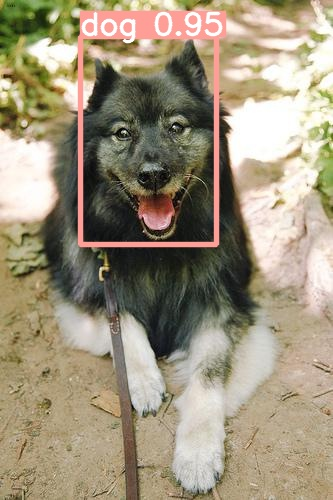

In [4]:
display(Image(filename=os.path.join("images", "oxford_pets_species", "keeshond_12_jpg.rf.e4f3e0b77f8c71584baf61b2025c0e54.jpg")))

### Oxford Pets by Breed

In [54]:
weights = "runs/train/yolov5s_oxford_pets_breed/weights/best.pt"
source = "datasets/oxford_pets_breed/test/images/Bengal_118_jpg.rf.7a191e38dc51f2a0864bfda9339ef8c9.jpg"
project = "images"
project_name = "oxford_pets_breed"

!python3 yolov5/detect.py --weights {weights} --source {source} --project {project} --name {project_name}

detect: weights=['runs/train/yolov5s_oxford_pets_breed/weights/best.pt'], source=datasets/oxford_pets_breed/test/images/Bengal_118_jpg.rf.7a191e38dc51f2a0864bfda9339ef8c9.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=images, name=oxford_pets_breed, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

Fusing layers... 
Model summary: 213 layers, 7109914 parameters, 0 gradients
image 1/1 /home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/object_detection/datasets/oxford_pets_breed/test/images/Bengal_118_jpg.rf.7a191e38dc51f2a0864bfda9339ef8c9.jpg: 640x480 1 cat-Bengal, Done. (0.007s)
Speed: 0.2ms pre-process, 6

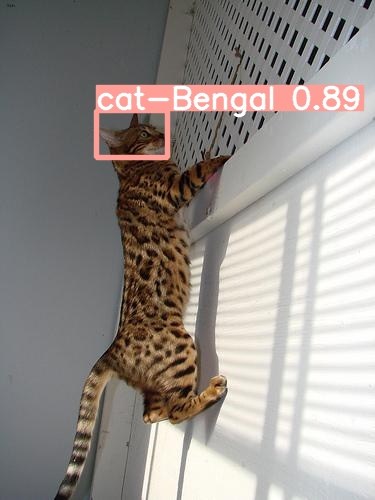

In [6]:
display(Image(filename=os.path.join("images", "oxford_pets_breed", "Bengal_118_jpg.rf.7a191e38dc51f2a0864bfda9339ef8c9.jpg")))

### Aquarium Dataset

In [53]:
weights = "runs/train/yolov5s_aquarium_sgd/weights/best.pt"
source = "datasets/aquarium/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg"
project = "images"
project_name = "aquarium"

!python3 yolov5/detect.py --weights {weights} --source {source} --project {project} --name {project_name}

detect: weights=['runs/train/yolov5s_aquarium_sgd/weights/best.pt'], source=datasets/aquarium/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=images, name=aquarium, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.8.10 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12045MiB)

Fusing layers... 
Model summary: 213 layers, 7029004 parameters, 0 gradients
image 1/1 /home/michaelkoepf/Documents/tu_wien/vu_dlvc/ue3_shared/src/object_detection/datasets/aquarium/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 640x480 1 penguin, Done. (0.006s)
Speed: 0.2ms pre-process, 6.5ms inference, 0.7ms NMS per

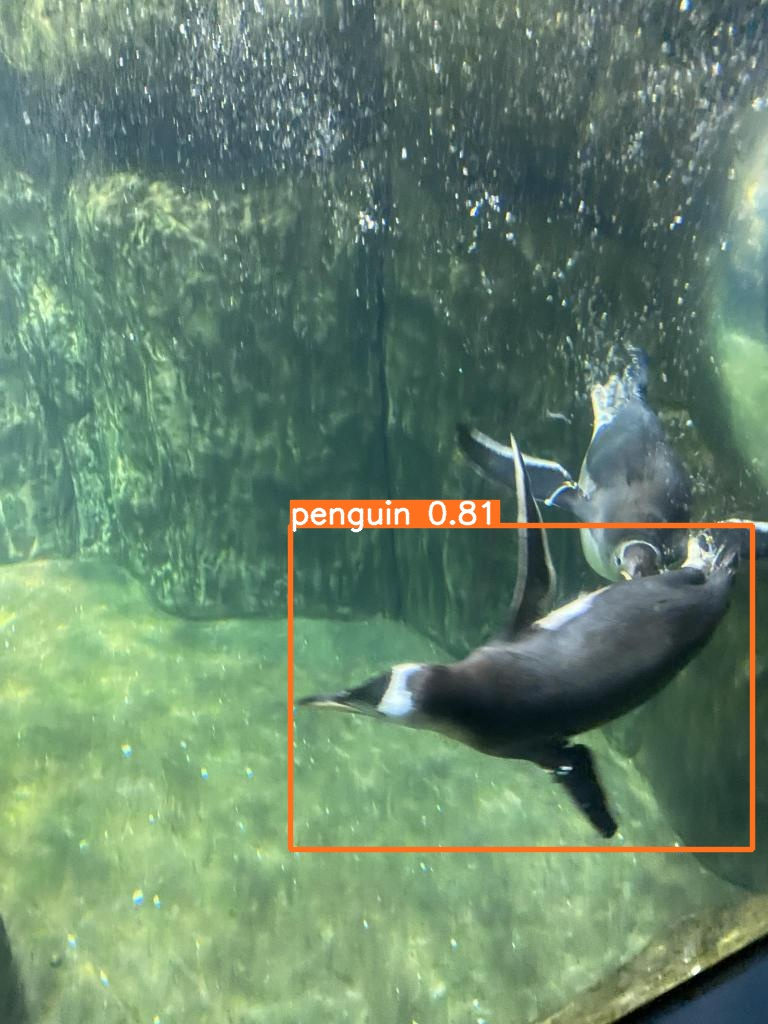

In [7]:
display(Image(filename=os.path.join("images", "aquarium", "IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg")))